#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Загрузка данных

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

###  Гистограмма распределения объема продаж всех игр в Японии

Text(0, 0.5, 'Кол-во записей')

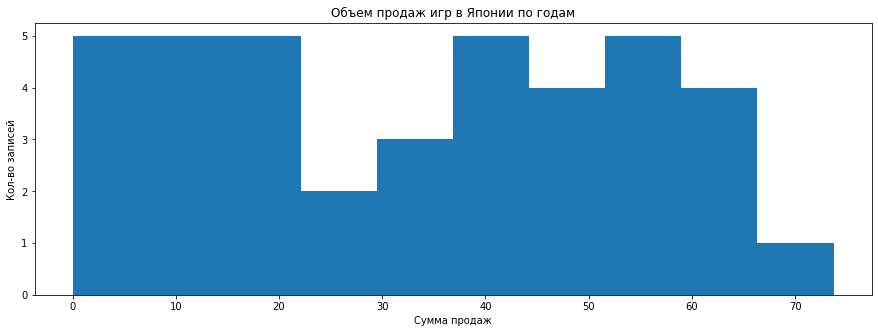

In [3]:
plt.figure(figsize=(15,5))
df_JPsales = df.groupby('Year')['JP_Sales'].sum()
plt.hist(df_JPsales, bins=10) 
plt.title("Объем продаж игр в Японии по годам")
plt.xlabel('Сумма продаж')
plt.ylabel('Кол-во записей')

### Cравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах

In [4]:
df_AutoV = df[(df['Name'] == "Grand Theft Auto V")].groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
df_AutoV.head()

Platform  Global_Sales
0      PS3         21.40
1     X360         16.38
2      PS4         11.98
3     XOne          5.08
4       PC          1.08

Text(0.5, 0, 'Platform')

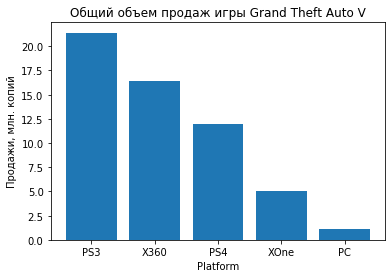

In [5]:
plt.bar(df_AutoV ['Platform'], df_AutoV ['Global_Sales'])
plt.title("Общий объем продаж игры Grand Theft Auto V")
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Platform')

### Линейный график динамики суммарных общемировых продаж всех игр по годам

In [83]:
df.index= df['Year']
df_games = df.groupby(df.index)['Global_Sales'].count()
df_games.head()

Year
1980.0     9
1981.0    46
1982.0    36
1983.0    17
1984.0    14
Name: Global_Sales, dtype: int64

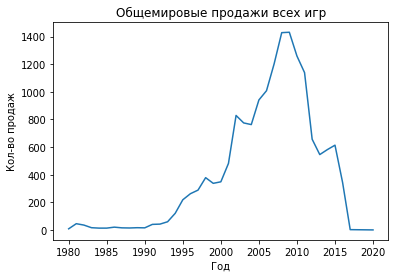

In [85]:
plt.title("Общемировые продажи всех игр")
plt.xlabel('Год')
plt.ylabel('Продажи, млн. копий')
plt.plot(df_games)

### Точечная диаграмма, зависимости продаж во всем мире от продаж в Северной Америке

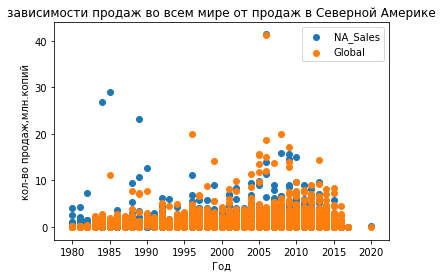

In [8]:
# т.к. кол-во продаж в С.А. входит в общее кол-во,был добавлен в датафрейм новый столбец:
# сумму продаж по всем странам, кроме С.А.

df["Global"] = df['Global_Sales'] - df['NA_Sales']
plt.scatter(df['Year'], df['NA_Sales'], label=f"NA_Sales")
plt.scatter(df['Year'], df['Global'], label=f"Global")
    
plt.title("зависимости продаж во всем мире от продаж в Северной Америке")
plt.ylabel('кол-во продаж,млн.копий')
plt.xlabel('Год')
plt.legend()
plt.show()

### Круговая диаграмма процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. 

Text(0.5, 1.0, 'Продажт игры Super Mario Bros на разных платформах во всем мире')

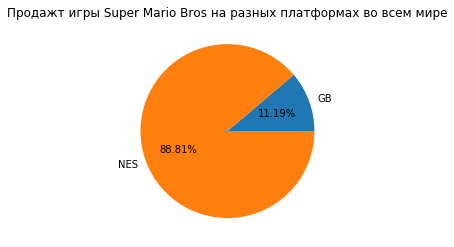

In [9]:
#df_mario = df[(df['Name'] == "Super Mario Bros.")][['Name', 'Global_Sales']]
df_mario = df[(df['Name'] == "Super Mario Bros.")].drop_duplicates().groupby('Platform')['Global_Sales'].sum()
plt.pie(df_mario, labels=df_mario.index, autopct='%1.2f%%') #autopct='%1.2f%%' - данные в процентах
plt.title("Продажи игры Super Mario Bros на разных платформах во всем мире")

###  5 издателей, имеющих наибольшие суммарные продажи во всем мире в 2013 году 

In [7]:
df_platform = df[(df['Year'] == 2013)].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

In [53]:
df_best5 = df_platform.loc[0:4]
df_best5

Publisher  Global_Sales
0       Electronic Arts         52.92
1              Nintendo         52.79
2  Take-Two Interactive         52.41
3            Activision         43.49
4               Ubisoft         27.39

In [126]:
y_range =  list(range(0,int(df_best5['Global_Sales'].max())+5,5))
y_range

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

In [102]:
df_best5['Global_Sales'].min()

27.390000000000008

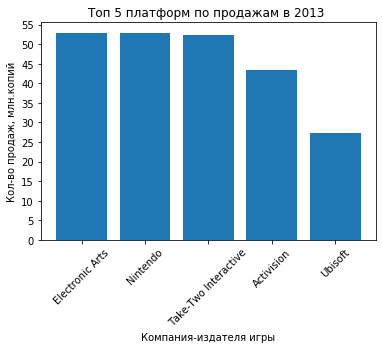

In [127]:
plt.bar(df_best5['Publisher'], df_best5['Global_Sales']) # 
plt.title("Топ 5 платформ по продажам в 2013 ")
plt.xlabel('Компания-издателя игры')
plt.ylabel('Кол-во продаж, млн.копий')
plt.xticks(df_best5['Publisher'], rotation=45)
plt.yticks(y_range)# как сделать, чтобы подписи не "съезжали"
plt.show()

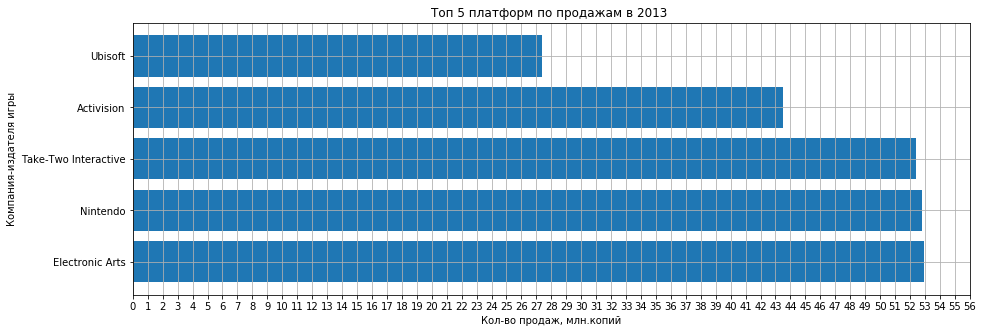

In [124]:
#так виднее различия между топ-3 
plt.figure(figsize=(15,5))
plt.grid()
y_range =  list(range(0,int(df_best5['Global_Sales'].max())+5))
y_range
plt.barh(df_best5['Publisher'], df_best5['Global_Sales'])
plt.title("Топ 5 платформ по продажам в 2013 ")
plt.xlabel('Кол-во продаж, млн.копий')
plt.ylabel('Компания-издателя игры')
plt.xticks(y_range)
plt.show()

### Гистограмма распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2010 по 2015 год включительно. 

In [9]:
df_excl_nin = df.loc[df['Publisher'] != "Nintendo"] # убираем Nintendo из данных

In [109]:
df_other_pub = df_excl_nin[(df_excl_nin['Year'] >= 2010) & (df_excl_nin['Year'] <= 2015)] # отбираем нужный период

Rank                            Name Platform    Year    Genre  \
15    16              Kinect Adventures!     X360  2010.0     Misc   
16    17              Grand Theft Auto V      PS3  2013.0   Action   
23    24              Grand Theft Auto V     X360  2013.0   Action   
29    30  Call of Duty: Modern Warfare 3     X360  2011.0  Shooter   
31    32         Call of Duty: Black Ops     X360  2010.0  Shooter   

                 Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
15  Microsoft Game Studios     14.97      4.94      0.24         1.67   
16    Take-Two Interactive      7.01      9.27      0.97         4.14   
23    Take-Two Interactive      9.63      5.31      0.06         1.38   
29              Activision      9.03      4.28      0.13         1.32   
31              Activision      9.67      3.73      0.11         1.13   

    Global_Sales  Sum_of_sales  find_mistake    IsMistake  
15         21.82         21.82  0.000000e+00  Not Mistake  
16         21.40         21.39  1.000000e-02  Not Mistake  
23         16.38         16.38 -3.552714e-15  Not Mistake  
29         14.76         14.76  0.000000e+00  Not Mistake  
31         14.64         14.64  0.000000e+00  Not Mistake

Text(0, 0.5, 'Кол-во продаж')

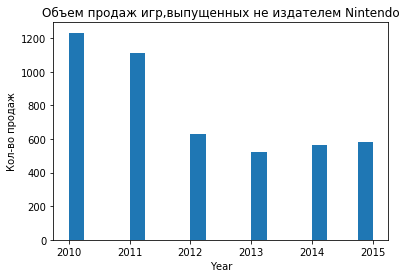

In [121]:
plt.hist(df_other_pub['Year'], bins=20) 
plt.title("Объем продаж игр,выпущенных не издателем Nintendo")
plt.xlabel('Year')
plt.ylabel('Кол-во продаж')

### Линейный график динамики суммарных мировых продаж игр жанра "Action" по годам

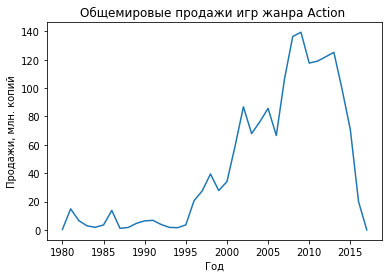

In [110]:
df_Action = df.loc[df['Genre'] == "Action"]
df_Action = df_Action.groupby('Year')['Global_Sales'].sum()
plt.title("Общемировые продажи игр жанра Action ")
plt.xlabel('Год')
plt.ylabel('Продажи, млн. копий')
plt.plot(df_Action)
plt.show()

###  Объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра.

In [20]:
df_Microsoft_NA = df.loc[df['Publisher'] == "Microsoft Game Studios"].groupby('Genre')\
                                         ['NA_Sales'].sum().sort_values(ascending=False).reset_index()

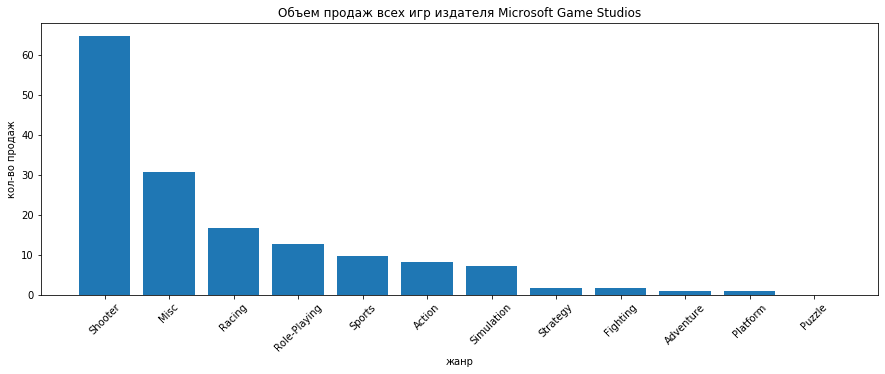

In [22]:
y_range =  list(range(0,int(df_Microsoft_NA['NA_Sales'].max()),10))
y_range
plt.figure(figsize=(15,5))
plt.bar(df_Microsoft_NA['Genre'],df_Microsoft_NA['NA_Sales'])
plt.title("Объем продаж всех игр издателя Microsoft Game Studios")
plt.ylabel('кол-во продаж')
plt.xlabel('жанр')
plt.xticks(rotation = 45)
plt.yticks(y_range)
plt.show()

# Проверка данных на корректность и отсутствие ошибок

Будем считать, что в записи имеется ошибка суммирования, если сумма продаж какой-либо игры в Северной Америке, Европе, Японии и остальных странах отличается от общемировых продаж более, чем на 0.01 млн копий.


In [24]:
df['Sum_of_sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [25]:
df['find_mistake'] = df['Global_Sales'] - df['Sum_of_sales']

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)>

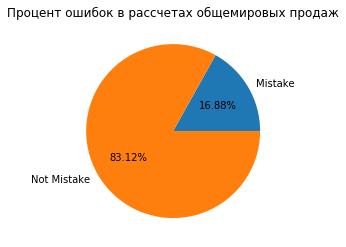

In [26]:
# если разница в сумме продаж будет с отрицательным значением, это тоже считается ошибкой. 
# поэтому прописаны два условия
df['IsMistake'] = np.where(((df['find_mistake'] >= 0.01) | (df['find_mistake'] < -0.01)), 'Mistake', 'Not Mistake')
serie2 = df[['Global_Sales', 'IsMistake']].groupby('IsMistake')['Global_Sales'].count()
serie2
plt.pie(serie2,labels=serie2.index ,autopct='%1.2f%%')
plt.title("Процент ошибок в рассчетах общемировых продаж")
plt.pie